In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# Step 1: Load the Data
df = pd.read_csv('weather.csv')

In [13]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   Month                          Date  MinTemp  MaxTemp  Rainfall  \
0      1 1970-01-01 00:00:00.000000001      8.0     24.3       0.0   
1      1 1970-01-01 00:00:00.000000002     14.0     26.9       3.6   
2      1 1970-01-01 00:00:00.000000003     13.7     23.4       3.6   
3      1 1970-01-01 00:00:00.000000004     13.3     15.5      39.8   
4      1 1970-01-01 00:00:00.000000005      7.6     16.1       2.8   

   Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am  ...  \
0          3.4       6.3          NW           30.0         SW  ...   
1          4.4       9.7         ENE           39.0          E  ...   
2          5.8       3.3          NW           85.0          N  ...   
3          7.2       9.1          NW           54.0        WNW  ...   
4          5.6      10.6         SSE           50.0        SSE  ...   

  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          29       1019.7       1015.0         7         7     14.4   

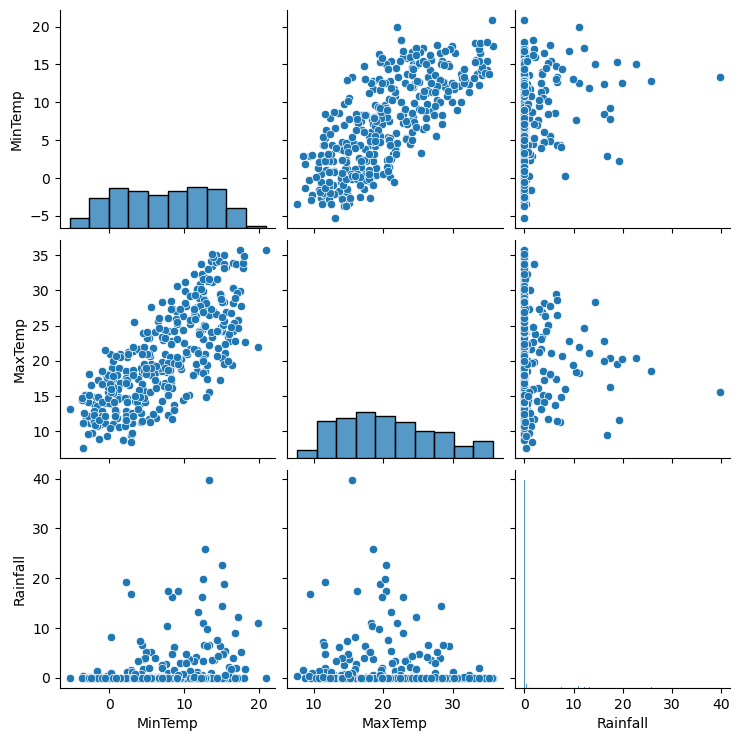

In [4]:
# Step 3: Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [5]:
# Step 4: Data Analysis (analyze each term)
# Example: Calculate average MaxTemp by month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_avg_max_temp = df.groupby('Month')['MaxTemp'].mean()

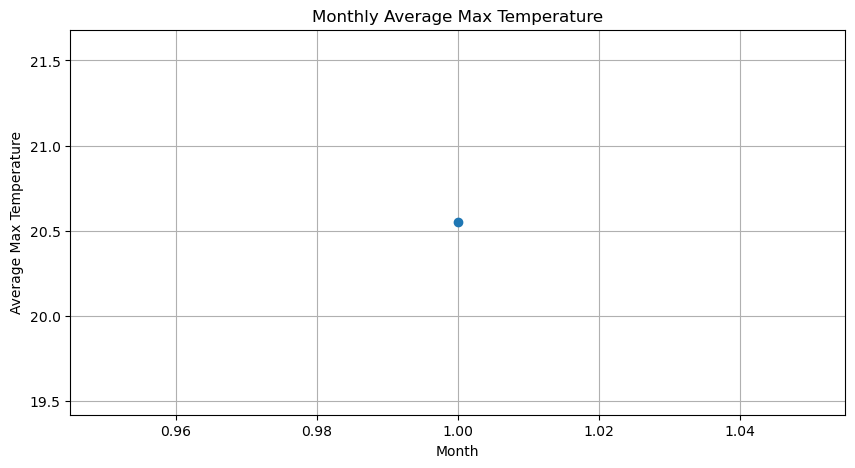

In [6]:
# Step 5: Data Visualization (Part 2)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg_max_temp.index, monthly_avg_max_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

In [7]:
# Step 6: Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.076845600582615


In [11]:
# Step 8: Conclusions and Insights (analyze each term)
# Example: Identify the highest and lowest rainfall months
highest_rainfall_month = monthly_avg_max_temp.idxmax()
lowest_rainfall_month = monthly_avg_max_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 1, Lowest rainfall month: 1
